# Objective:
1. Clean Names like "&&" And non Alphabets
2. Make sure Number of Males == Number of Females, to balance the dataset and ensure it is NOT skewed
3. Skewness will cause trained model to be biased

# Import Libraries

In [13]:
print('Innit Importing Library...')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dense, Activation, Dropout, LSTM, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split

Innit Importing Library...


# Read Data

In [14]:
fpath = '/content/mydrive/MyDrive/personal_data/Random_Data/REA/name_gender.csv'
fpath = 'name_gender.csv'
import pandas as pd
df = pd.read_csv(fpath)
df

,Unnamed: 0,name,gender
0,0,kintrell,M
1,1,quinnell,M
2,2,tylerlee,M
3,3,quincy,M
4,4,slavko,M
...,...,...,...
69437,69437,ikem,M
69438,69438,gradie,M
69439,69439,gaibriel,M
69440,69440,vermont,M


# Function to Clean and obtain only characters

In [15]:
print('Innit Cleaning DataFrame...')
import re
# string with letters, numbers, and special characters
def clean_letters(s):
    # keep only letters
    res = re.sub(r'[^a-zA-Z]', '', s)
    return res
df['name']=df['name'].apply(lambda x: clean_letters(x))
df.head()

Innit Cleaning DataFrame...


,Unnamed: 0,name,gender
0,0,kintrell,M
1,1,quinnell,M
2,2,tylerlee,M
3,3,quincy,M
4,4,slavko,M


# Drop Duplicates and Lower Case Alphabets

In [16]:
df.drop_duplicates(subset=['name'],inplace=True)

In [17]:
columnsTitles=["name","gender"]
df=df.reindex(columns=columnsTitles)
df['name'] = df['name'].apply(lambda x: str(x).lower())
df = df[[len(e)>1 for e in df.name]]
df = df.drop_duplicates()
names = df['name'].apply(lambda x: x.lower())
gender = df['gender']
df.head()

,name,gender
0,kintrell,M
1,quinnell,M
2,tylerlee,M
3,quincy,M
4,slavko,M


# Quick EDA 

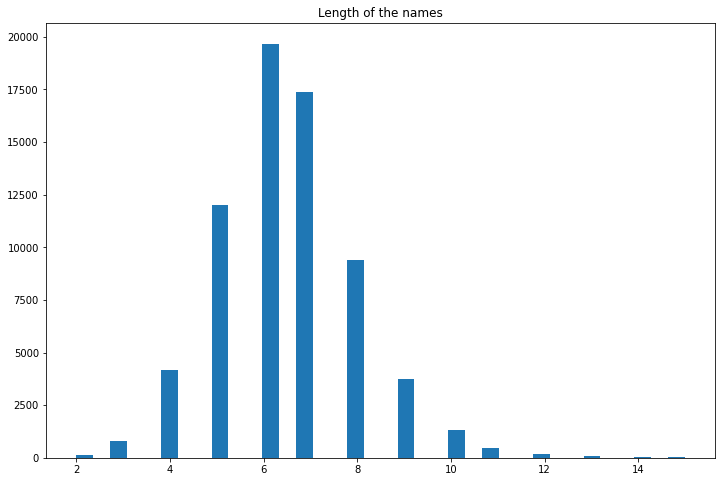

In [18]:
plt.figure(figsize=(12,8))
plt.hist([len(a) for a in names], bins=36)
plt.title("Length of the names")
plt.show()

In [19]:
print('End Result of M/F Balanced DataFrame ')
print("Male : " + str(sum(gender=='M')))
print("Female : " + str(sum(gender=='F')))

End Result of M/F Balanced DataFrame 
Male : 34721
Female : 34721


### Note: DAta is highly imbalanced with 34,721 Males vs 60,304 Females,

# Balance Data where Num Males = Num Females

In [20]:
df_male = df[df['gender'] =='M']#.reset_index(drop=True,inplace=True)#[:34721]
df_female = df[df['gender'] =='F']#.reset_index(drop=True,inplace=True)#[:34721]
df_male.reset_index(drop=True,inplace=True)#[:34721]
df_male=df_male[:34721]
df_male

df_female = df[df['gender'] =='F']#.reset_index(drop=True,inplace=True)#[:34721]
df_female.reset_index(drop=True,inplace=True)#[:34721]
df_female=df_female[:34721]
df_female

df_concat = pd.concat([df_male, df_female],axis=0)
df_concat.reset_index(drop=True,inplace=True)
df_concat

,name,gender
0,kintrell,M
1,quinnell,M
2,tylerlee,M
3,quincy,M
4,slavko,M
...,...,...
69437,eulina,F
69438,euradell,F
69439,ahriel,F
69440,dneisha,F


# Shuffle DataSet

In [21]:
df_concat = df_concat.sample(frac=1).reset_index(drop=True)
df_concat

,name,gender
0,levina,F
1,armelle,F
2,ahbleza,M
3,keiya,F
4,destony,F
...,...,...
69437,brandonjames,M
69438,catarena,F
69439,vontavius,M
69440,jainiya,F


# Save DataSet

In [22]:
print('Innit Saving DataFrame...')
df_concat.to_csv('name_gender_clean.csv')

Innit Saving DataFrame...


In [23]:
df_concat

,name,gender
0,levina,F
1,armelle,F
2,ahbleza,M
3,keiya,F
4,destony,F
...,...,...
69437,brandonjames,M
69438,catarena,F
69439,vontavius,M
69440,jainiya,F
